## Decision Tree - Classification

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [35]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [37]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [38]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [39]:
10/344

0.029069767441860465

In [40]:
df.dropna(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [42]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [43]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [44]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [45]:
df.drop(index=336, inplace=True)

In [46]:
df2 = df.copy()

## Visualization

In [47]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

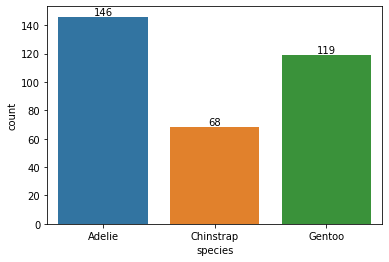

In [48]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0]);

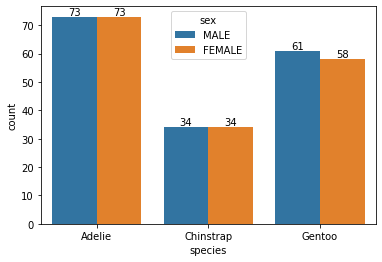

In [49]:
ax = sns.countplot(x="species", hue="sex", data = df)
for p in ax.containers:
    ax.bar_label(p)

<Figure size 864x432 with 0 Axes>

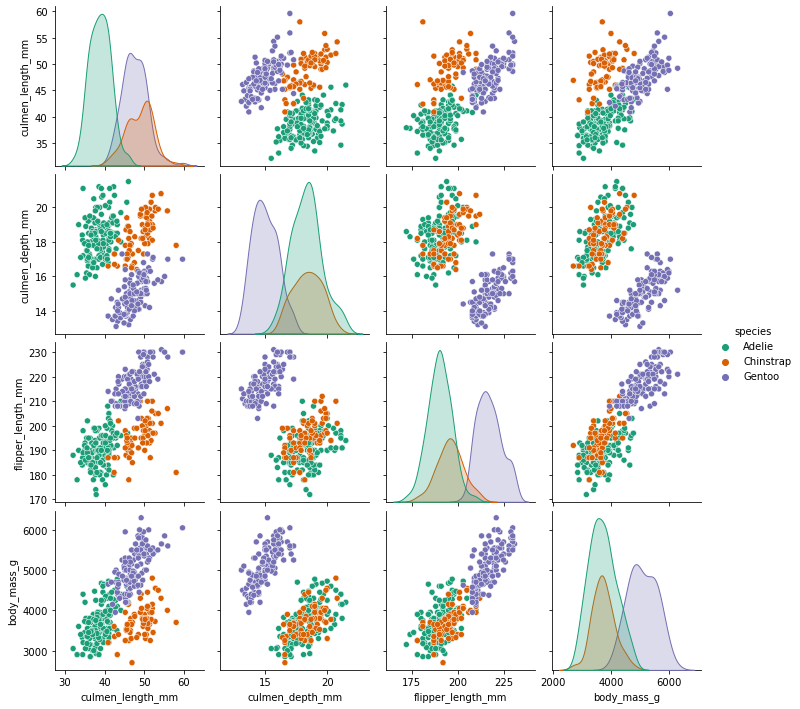

In [50]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

In [51]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [52]:
# !pip install plotly

In [53]:
import plotly.express as px

In [54]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

## Correlation beetwen numeric features

In [55]:
df.select_dtypes("number")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


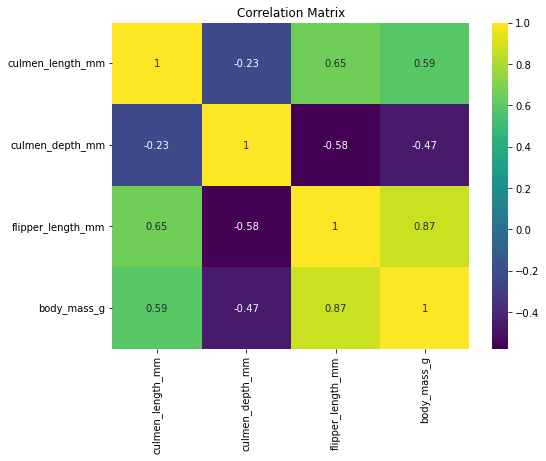

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## Train | Test Split

In [57]:
X = df2.drop(columns="species")
y = df2['species']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## OrdinalEncoder and Categoric Variable

In [60]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [61]:
X_train[cat]

,island,sex
314,Biscoe,FEMALE
248,Biscoe,FEMALE
199,Dream,MALE
182,Dream,FEMALE
238,Biscoe,FEMALE
...,...,...
81,Torgersen,MALE
93,Dream,MALE
69,Torgersen,MALE
335,Biscoe,MALE


In [62]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit_transform(X_train[cat])

array([[0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [2., 1.],
       [1., 0.],
       [1., 1.],
       [2., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [2., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [2., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [63]:
X_train[cat] = enc.fit_transform(X_train[cat])
X_train[cat]

,island,sex
314,0.0,0.0
248,0.0,0.0
199,1.0,1.0
182,1.0,0.0
238,0.0,0.0
...,...,...
81,2.0,1.0
93,1.0,1.0
69,2.0,1.0
335,0.0,1.0


In [64]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
314,0.0,44.5,14.7,214.0,4850.0,0.0
248,0.0,48.2,14.3,210.0,4600.0,0.0
199,1.0,49.0,19.6,212.0,4300.0,1.0
182,1.0,40.9,16.6,187.0,3200.0,0.0
238,0.0,46.2,14.5,209.0,4800.0,0.0


In [65]:
X_test[cat] = enc.transform(X_test[cat])
X_test[cat]

,island,sex
171,1.0,1.0
250,0.0,1.0
140,1.0,0.0
130,2.0,0.0
214,1.0,0.0
...,...,...
156,1.0,1.0
70,2.0,0.0
78,2.0,0.0
287,0.0,1.0


In [66]:
X_test.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
171,1.0,49.2,18.2,195.0,4400.0,1.0
250,0.0,47.3,15.3,222.0,5250.0,1.0
140,1.0,40.2,17.1,193.0,3400.0,0.0
130,2.0,38.5,17.9,190.0,3325.0,0.0
214,1.0,45.7,17.0,195.0,3650.0,0.0


## Modeling with Pipeline

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [68]:
X_train.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
314,Biscoe,44.5,14.7,214.0,4850.0,FEMALE
248,Biscoe,48.2,14.3,210.0,4600.0,FEMALE


In [69]:
X_test.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
171,Dream,49.2,18.2,195.0,4400.0,MALE
250,Biscoe,47.3,15.3,222.0,5250.0,MALE


In [70]:
cat

Index(['island', 'sex'], dtype='object')

In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

## Model Performance on Classification Tasks

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [74]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

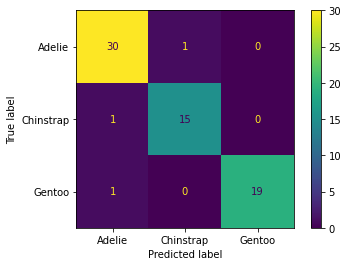

In [75]:
plot_confusion_matrix(pipe_model,X_test,y_test)

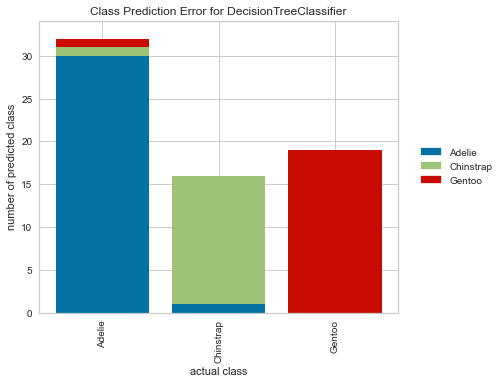

In [43]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [76]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]
              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



## Cross Validate

In [77]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [78]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.008998,0.017903,0.925926,0.925926,0.925926,0.925926
2,0.008190,0.265044,1.000000,1.000000,1.000000,1.000000
3,0.041143,0.122252,0.888889,0.888889,0.888889,0.888889
4,0.024135,0.020220,1.000000,1.000000,1.000000,1.000000
5,0.031555,0.051741,1.000000,1.000000,1.000000,1.000000
6,0.046395,0.035158,1.000000,1.000000,1.000000,1.000000
7,0.015330,0.023787,1.000000,1.000000,1.000000,1.000000
8,0.021322,0.020203,1.000000,1.000000,1.000000,1.000000
9,0.009008,0.007052,0.961538,0.961538,0.961538,0.961538
10,0.015034,0.044216,0.961538,0.961538,0.961538,0.961538


In [79]:
df_scores.mean()[2:]

test_accuracy           0.973789
test_precision_micro    0.973789
test_recall_micro       0.973789
test_f1_micro           0.973789
dtype: float64

## Evaluating ROC Curves and AUC

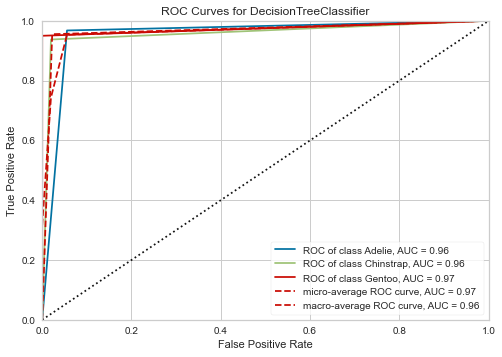

In [80]:
from yellowbrick.classifier import ROCAUC

model = pipe_model

visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

## Feature İmportances with Pipeline

https://github.com/scikit-learn/scikit-learn/issues/21304

In [81]:
pipe_model["DT_model"].feature_importances_ # DT_model.feature_importances_

array([0.03327601, 0.02363079, 0.35128085, 0.04724943, 0.54456291,
       0.        ])

In [50]:
X_train.head(1)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
314,Biscoe,44.5,14.7,214.0,4850.0,FEMALE


In [51]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train))

,0,1,2,3,4,5
0,0.0,0.0,44.5,14.7,214.0,4850.0
1,0.0,0.0,48.2,14.3,210.0,4600.0
2,1.0,1.0,49.0,19.6,212.0,4300.0
3,1.0,0.0,40.9,16.6,187.0,3200.0
4,0.0,0.0,46.2,14.5,209.0,4800.0
...,...,...,...,...,...,...
261,2.0,1.0,42.9,17.6,196.0,4700.0
262,1.0,1.0,39.6,18.1,186.0,4450.0
263,2.0,1.0,41.8,19.4,198.0,4450.0
264,0.0,1.0,55.1,16.0,230.0,5850.0


In [52]:
X_train.columns

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [53]:
list(X_train.select_dtypes("object").columns)

['island', 'sex']

In [54]:
list(X_train.select_dtypes("number").columns)

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [55]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [56]:
df_f_i = pd.DataFrame(data = pipe_model["DT_model"].feature_importances_, index=features, #index=X.columns
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
flipper_length_mm,0.544563
culmen_length_mm,0.351281
culmen_depth_mm,0.047249
island,0.033276
sex,0.023631
body_mass_g,0.000000


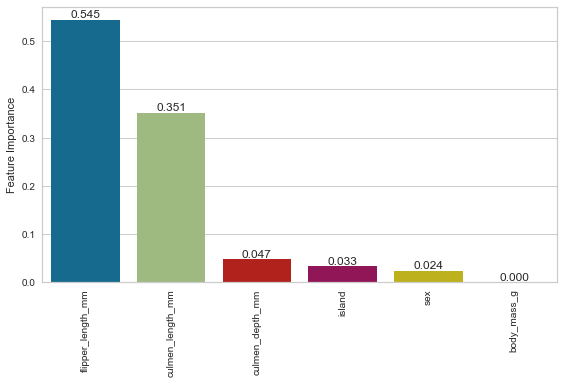

In [57]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

## Drop most important feature

In [58]:
X.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [59]:
X2 = X.drop(columns = ["flipper_length_mm"]) 

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

In [61]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

In [62]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [63]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.090999,0.003000,0.962963,0.962963,0.962963,0.962963
2,0.002001,0.003000,1.000000,1.000000,1.000000,1.000000
3,0.003000,0.003000,0.925926,0.925926,0.925926,0.925926
4,0.002003,0.002995,1.000000,1.000000,1.000000,1.000000
5,0.001995,0.003001,1.000000,1.000000,1.000000,1.000000
6,0.003004,0.003001,0.962963,0.962963,0.962963,0.962963
7,0.002993,0.003000,1.000000,1.000000,1.000000,1.000000
8,0.002000,0.002997,1.000000,1.000000,1.000000,1.000000
9,0.003000,0.002004,1.000000,1.000000,1.000000,1.000000
10,0.001997,0.003003,1.000000,1.000000,1.000000,1.000000


In [64]:
df_scores.mean()[2:]

test_accuracy           0.985185
test_precision_micro    0.985185
test_recall_micro       0.985185
test_f1_micro           0.985185
dtype: float64

## Adelie-Chinstrap weighted metric Scores

In [65]:
from sklearn.metrics import make_scorer

In [66]:
scoring = {'precision-Adelie-Chinstrap': make_scorer(precision_score,  average="weighted", labels=["Adelie", "Chinstrap"]),
           'recall-Adelie-Chinstrap': make_scorer(recall_score, average="weighted", labels =["Adelie", "Chinstrap"]),
           'f1-Adelie-Chinstrap': make_scorer(f1_score, average="weighted", labels = ["Adelie", "Chinstrap"])
          
          }

In [67]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie-Chinstrap    0.981303
test_recall-Adelie-Chinstrap       0.982353
test_f1-Adelie-Chinstrap           0.979985
dtype: float64

## Visualize the Tree

In [68]:
from sklearn.tree import plot_tree

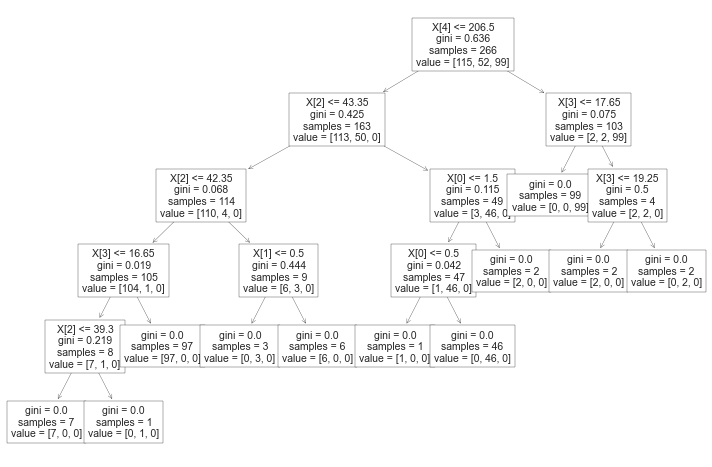

In [69]:
plt.figure(figsize=(12,8), dpi=75)
plot_tree(pipe_model["DT_model"], fontsize=10);

In [70]:
X.columns

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [71]:
features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

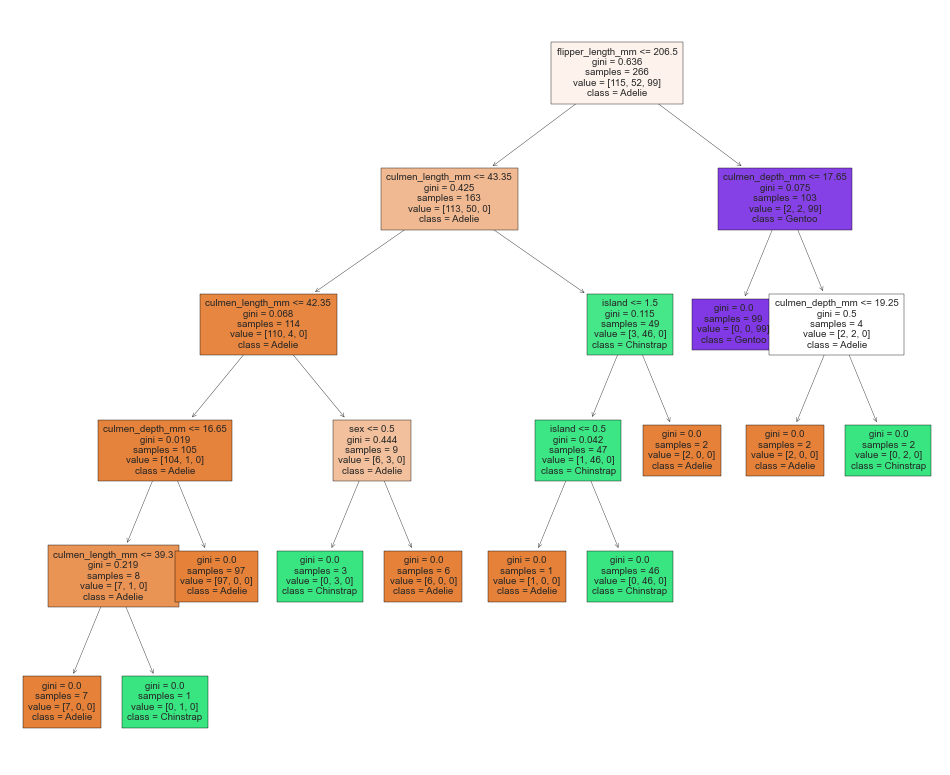

In [72]:
plt.figure(figsize=(12,10),dpi=100)
plot_tree(pipe_model["DT_model"], filled=True, feature_names=features, class_names= y.unique(), fontsize=7);

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf

In [73]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"], filled=True, feature_names=features, class_names = y.unique(), fontsize=10);
    #feature_names=X.columns

In [74]:
DT_model = DecisionTreeClassifier(max_depth=2, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=2, random_state=101))])



Test Set
[[30  1  0]
 [ 4 12  0]
 [ 0  1 19]]


              precision    recall  f1-score   support

      Adelie       0.88      0.97      0.92        31
   Chinstrap       0.86      0.75      0.80        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.91        67
   macro avg       0.91      0.89      0.90        67
weighted avg       0.91      0.91      0.91        67



Train Set
[[112   3   0]
 [  6  46   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96       115
   Chinstrap       0.94      0.88      0.91        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.97       266
   macro avg       0.96      0.95      0.96       266
weighted avg       0.97      0.97      0.97       266



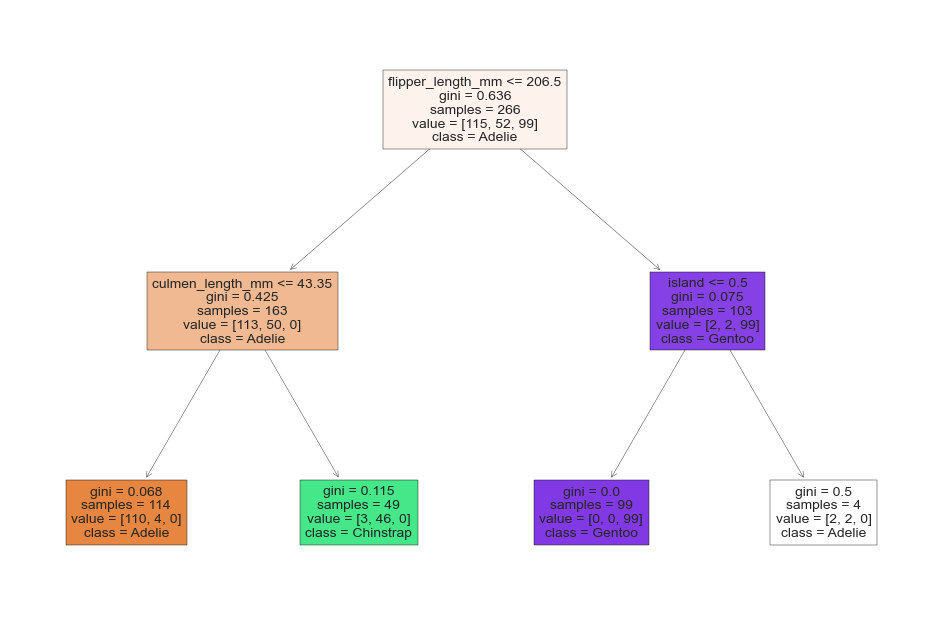

In [75]:
report_model(pruned_tree)

### Max Leaf Nodes

In [76]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree_2 = Pipeline(steps=operations)
pruned_tree_2.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_leaf_nodes=7, random_state=101))])



Test Set
[[30  1  0]
 [ 2 14  0]
 [ 1  0 19]]


              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        31
   Chinstrap       0.93      0.88      0.90        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.94        67
   macro avg       0.95      0.93      0.94        67
weighted avg       0.94      0.94      0.94        67



Train Set
[[115   0   0]
 [  4  48   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98       115
   Chinstrap       1.00      0.92      0.96        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.98       266
   macro avg       0.99      0.97      0.98       266
weighted avg       0.99      0.98      0.98       266



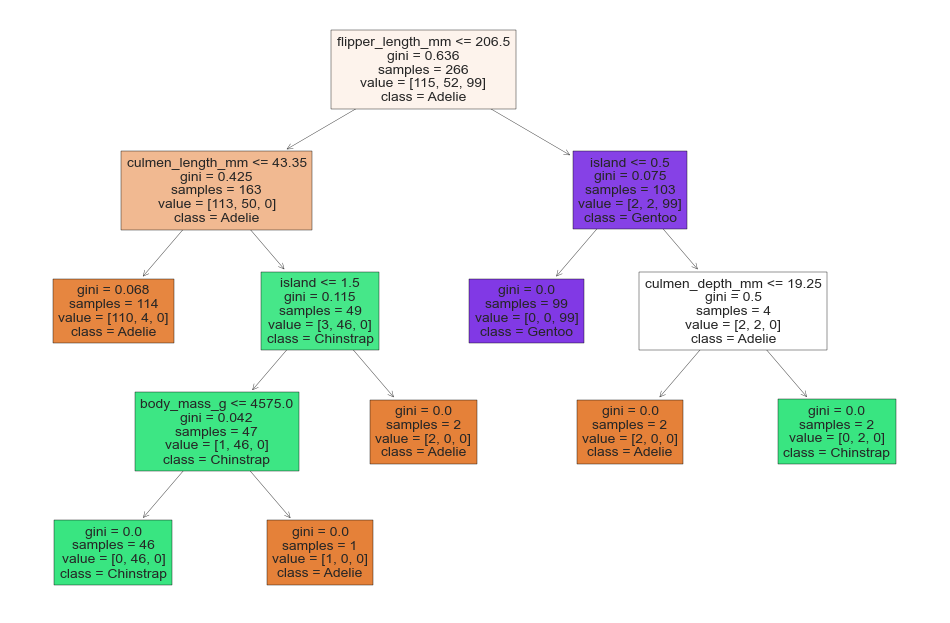

In [77]:
report_model(pruned_tree_2)

## Criterion

In [78]:
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=101)
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

entropy_tree = Pipeline(steps=operations)

entropy_tree.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(criterion='entropy',
                                        random_state=101))])



Test Set
[[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]


              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



Train Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



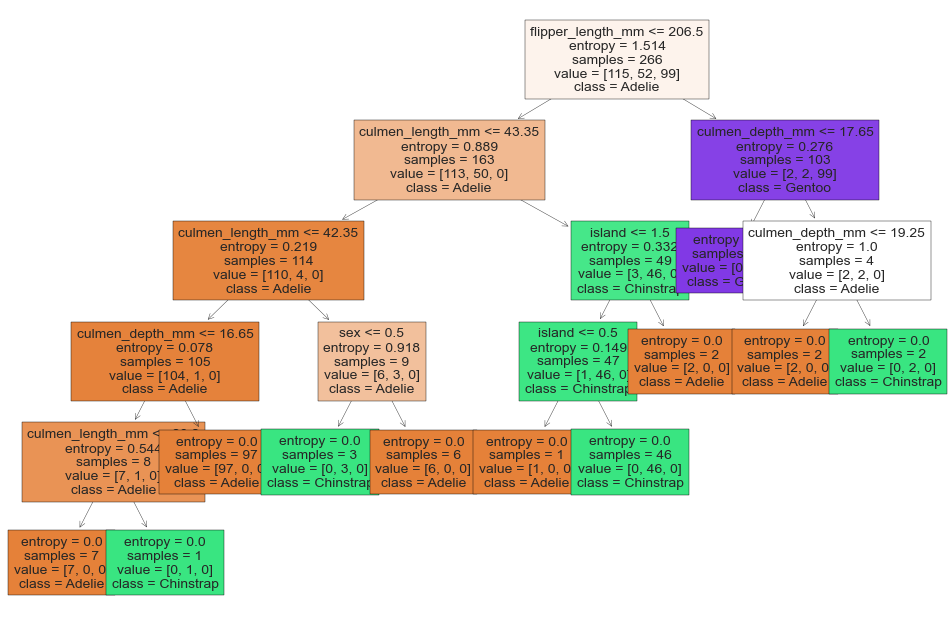

In [79]:
report_model(entropy_tree)

## Max_features, Splitter

In [80]:
DT_model = DecisionTreeClassifier(splitter = "random", max_features=3)
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_features=3, splitter='random'))])



Test Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



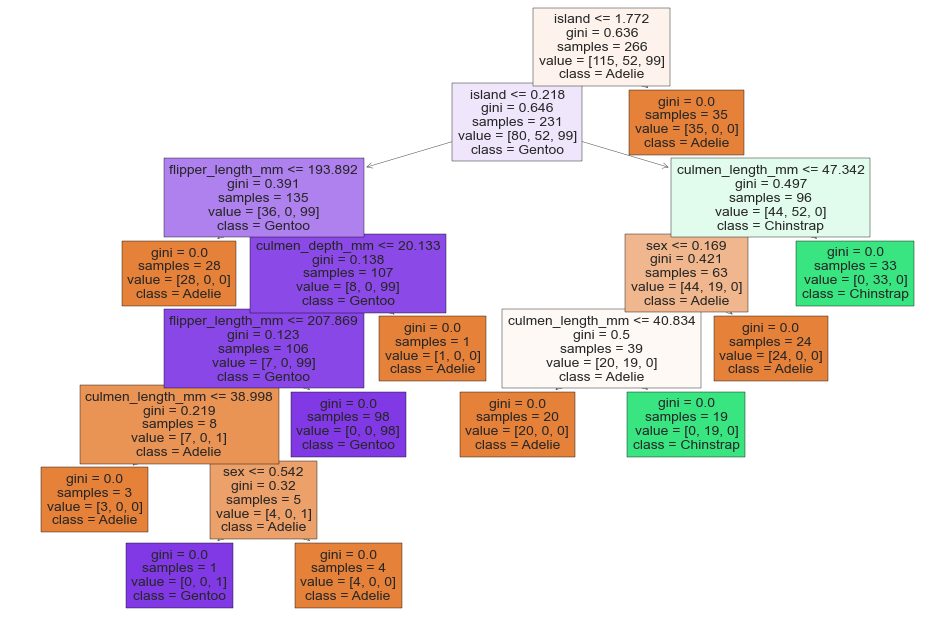

In [81]:
report_model(tree)

## Find Best Parameters

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

In [84]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "DT_model__max_depth": [None, 2, 3, 4, 5],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [85]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [86]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4, 5],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                        

In [87]:
grid_model.best_score_

0.9888888888888889

In [88]:
grid_model.best_params_

{'DT_model__max_depth': None,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 9,
 'DT_model__splitter': 'best'}

In [89]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

In [90]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train_Set
[[114   1   0]
 [  1  51   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       115
   Chinstrap       0.98      0.98      0.98        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266



In [91]:
operations = [("OneHotEncoder", column_trans), ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))]

scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.988889
test_precision_micro    0.988889
test_recall_micro       0.988889
test_f1_micro           0.988889
dtype: float64

## Final Model

In [92]:
X = df.drop(columns=["species", "flipper_length_mm"])
y = df['species']

In [93]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))]

pipe_final_model = Pipeline(steps=operations)

pipe_final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

## Prediction

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [95]:
samples = {"island": ["Torgersen", "Biscoe"],
           "culmen_length_mm": [39, 48],
           "culmen_depth_mm":[18,14],
           'flipper_length_mm':[180, 214],
           'body_mass_g': [3700,4900],
           "sex":["MALE","FEMALE"]}

In [96]:
df_samples = pd.DataFrame(samples)
df_samples

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39,18,180,3700,MALE
1,Biscoe,48,14,214,4900,FEMALE


In [97]:
pd.DataFrame(column_trans.transform(df_samples))

,0,1,2,3,4
0,2.0,1.0,39.0,18.0,3700.0
1,0.0,0.0,48.0,14.0,4900.0


In [98]:
pipe_final_model.predict(df_samples)

array(['Adelie', 'Gentoo'], dtype=object)